In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np


In [2]:


def read_csv_to_dataframe(file_path):
    # Ler o CSV
    df = pd.read_csv(file_path)
    
    # Garantir que a coluna 'Date' esteja no formato datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Definir o índice do DataFrame para ser a coluna 'Date'
    df.set_index('Date', inplace=True)
    
    # Garantir que as colunas 'Open', 'High', 'Low', 'Close' sejam numéricas
    df = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)
    
    return df

def plot_candlestick_from_dataframe(df, num_candles, title):
    # Filtrar os dados para o número de candles desejado
    df = df[-num_candles:]
    
    # Configuração do tamanho da figura
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot do gráfico candlestick
    mpf.plot(df, type='candle', style='charles', ax=ax, axtitle=title,
             ylabel='Price', show_nontrading=True)
    
    # Retorna a figura e o eixo (não exibe ainda)
    return fig, ax

def plot_two_candlestick_charts(df1, num_candles1, df2, num_candles2, title1, title2):
    # Filtrar os dados para o número de candles desejado para cada gráfico
    df1 = df1[-num_candles1:]
    df2 = df2[-num_candles2:]
    
    # Configuração do layout para dois gráficos um em cima do outro
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
    
    # Plot do primeiro gráfico candlestick
    mpf.plot(df1, type='candle', style='charles', ax=ax1, axtitle=title1,
             ylabel='Price', show_nontrading=True)
    
    # Plot do segundo gráfico candlestick
    mpf.plot(df2, type='candle', style='charles', ax=ax2, axtitle=title2,
             ylabel='Price', show_nontrading=True)
    
    # Ajuste para espaçamento entre os gráficos
    plt.subplots_adjust(hspace=0.4)
    
    # Retorna a figura e os eixos (não exibe ainda)
    return fig, (ax1, ax2)



/tmp/ipykernel_28090/2652031760.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


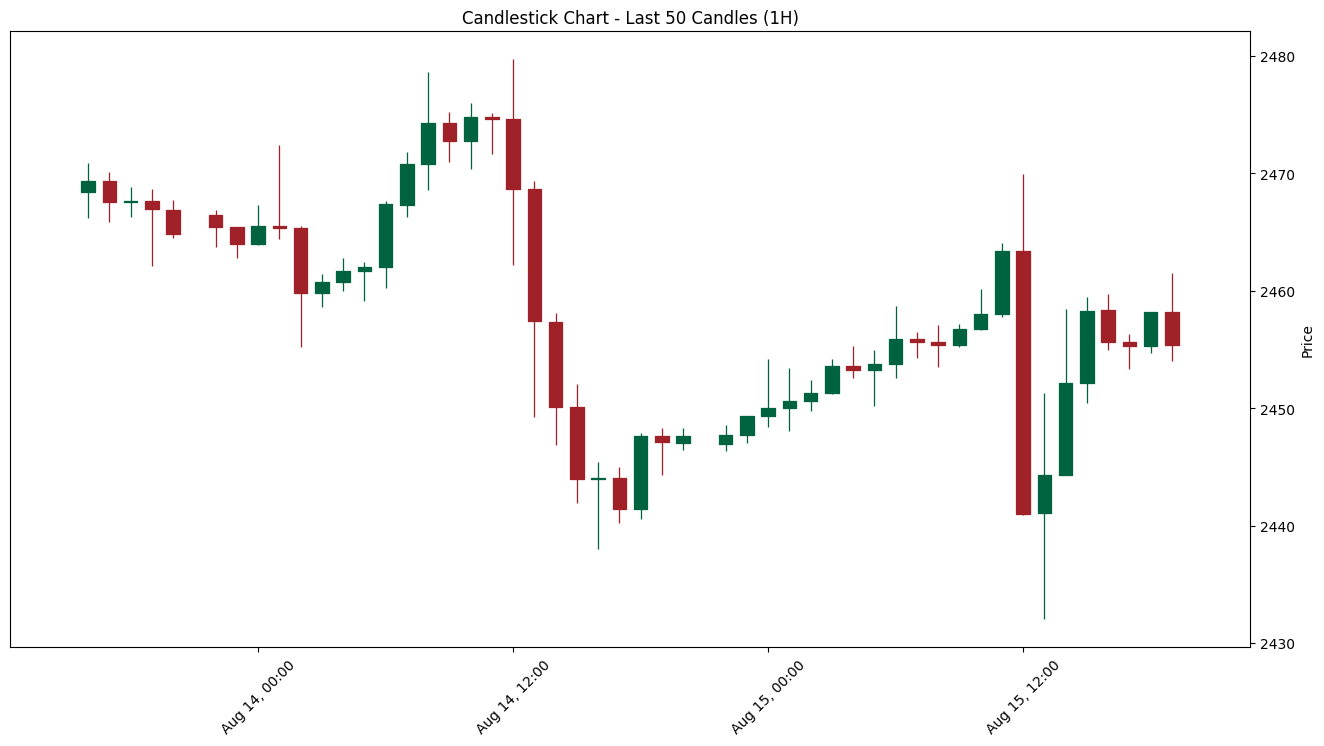

In [3]:
df_m15 = read_csv_to_dataframe('XAUUSD_M15.csv')
df_h1 = read_csv_to_dataframe('XAUUSD_H1.csv')
df_d1 = read_csv_to_dataframe('XAUUSD_D1.csv')
fig, ax = plot_candlestick_from_dataframe(df_h1, 50, 'Candlestick Chart - Last 50 Candles (1H)')
# Quando quiser mostrar o gráfico:
fig.show()

In [4]:
df_h1

,Open,High,Low,Close
Date,,,,
2008-01-10 11:00:00,875.124,876.852,873.517,876.468
2008-01-10 12:00:00,876.426,876.604,868.475,868.606
2008-01-10 13:00:00,868.460,874.253,866.151,873.982
2008-01-10 14:00:00,873.933,885.521,871.589,883.792
2008-01-10 15:00:00,883.926,885.596,880.827,882.750
...,...,...,...,...
2024-08-15 15:00:00,2452.148,2459.475,2450.448,2458.255
2024-08-15 16:00:00,2458.328,2459.755,2454.955,2455.628
2024-08-15 17:00:00,2455.655,2456.315,2453.338,2455.308


In [7]:
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp


# Configuração para exibir gráficos no navegador
pio.renderers.default = 'browser'

# Calcular Bandas de Bollinger separadamente e combiná-las com o DataFrame original
df_m15 = df_m15.loc['2023-08-15 15:00:00':'2024-08-15 15:00:00']
bollinger_bands = df_m15.ta.bbands(close=df_m15['Close'], length=60, std=2)
data = pd.concat([df_m15, bollinger_bands], axis=1)

In [5]:




# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# Bandas de Bollinger
fig.add_trace(go.Scatter(x=data.index, y=data['BBU_60_2.0'], mode='lines', name='Upper Band', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=data['BBM_60_2.0'], mode='lines', name='Middle Band', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['BBL_60_2.0'], mode='lines', name='Lower Band', line=dict(color='green', dash='dash')))


# Configurações do layout com zoom de caixa ajustado para ambos os eixos
fig.update_layout(
    title='Bandas de Bollinger com Candlestick',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical
    height=900
)

# Exibindo o gráfico no navegador
fig.show()


In [6]:
# Cálculo do RSI usando pandas_ta
data['RSI'] = ta.rsi(data['Close'], length=14)

# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# RSI
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI'))

# Linhas de sobrecompra e sobrevenda
fig.add_trace(go.Scatter(x=data.index, y=[70]*len(data), mode='lines', name='Overbought', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=[30]*len(data), mode='lines', name='Oversold', line=dict(color='green', dash='dash')))

# Configurações do layout com zoom de caixa ajustado para ambos os eixos
fig.update_layout(
    title='RSI com Candlestick',
    xaxis_title='Time',
    yaxis_title='RSI Value',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical
    height=600
)

# Exibindo o gráfico no navegador
fig.show()

In [19]:
# Cálculo do RSI usando pandas_ta
data['RSI'] = ta.rsi(data['Close'], length=14)

# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# RSI
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI'))

# Bandas de Bollinger
fig.add_trace(go.Scatter(x=data.index, y=data['BBU_20_2.0'], mode='lines', name='Upper Band', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=data.index, y=data['BBM_20_2.0'], mode='lines', name='Middle Band', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['BBL_20_2.0'], mode='lines', name='Lower Band', line=dict(color='green', dash='dash')))

# Configurações do layout com dragmode box para zoom de caixa
fig.update_layout(
    title='Bandas de Bollinger com Candlestick',
    xaxis_title='Time',
    yaxis_title='Price',
    dragmode='zoom'  # Ajuste para permitir zoom de caixa
)

# Exibindo o gráfico no navegador
fig.show()

In [37]:
# Médias móveis de 50 e 200 períodos usando pandas_ta
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# Médias móveis
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='SMA 50', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='SMA 200', line=dict(color='purple')))

# Configurações do layout com zoom de caixa ajustado para ambos os eixos
fig.update_layout(
    title='Médias Móveis com Candlestick',
    xaxis_title='Time',
    yaxis_title='Price',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical
    height=600
)

# Exibindo o gráfico no navegador
fig.show()

In [39]:
# Cálculo do Desvio Padrão usando pandas_ta
data['StdDev'] = ta.stdev(data['Close'], length=20)

# Criando o gráfico interativo com Plotly
fig = go.Figure()

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# Desvio Padrão
fig.add_trace(go.Scatter(x=data.index, y=data['StdDev'], mode='lines', name='Standard Deviation', line=dict(color='blue')))

# Configurações do layout com zoom de caixa ajustado para ambos os eixos
fig.update_layout(
    title='Desvio Padrão com Candlestick',
    xaxis_title='Time',
    yaxis_title='Standard Deviation',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical
    height=600
)

# Exibindo o gráfico no navegador
fig.show()

In [47]:
# Cálculo das Médias Móveis e ADX usando pandas_ta
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)
data['ADX'] = ta.adx(data['High'], data['Low'], data['Close'], length=14)['ADX_14']

# Criando o subplot com 2 linhas, diminuindo a proporção do ADX
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, 
                       vertical_spacing=0.1, row_heights=[0.7, 0.3], 
                       subplot_titles=("Candlestick com Médias Móveis", "ADX"))

# Preço de fechamento em formato de Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'), row=1, col=1)

# Médias móveis (primeiro subplot)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='SMA 50', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='SMA 200', line=dict(color='purple')), row=1, col=1)

# ADX no subplot abaixo
fig.add_trace(go.Scatter(x=data.index, y=data['ADX'], mode='lines', name='ADX', line=dict(color='blue')), row=2, col=1)

# Configurações do layout com zoom de caixa ajustado para ambos os eixos e tamanho ajustado do ADX
fig.update_layout(
    title='Tendência Confirmada com Médias Móveis e ADX',
    xaxis_title='Time',
    yaxis_title='Price',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico principal
    yaxis2=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico do ADX
    height=800  # Aumentar altura para acomodar os subplots
)

# Exibindo o gráfico no navegador
fig.show()

In [57]:
# Cálculo das Médias Móveis, Bandas de Bollinger e ADX usando pandas_ta
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)
bollinger_bands = data.ta.bbands(close=data['Close'], length=40, std=2)
data = pd.concat([data, bollinger_bands], axis=1)
data['ADX'] = ta.adx(data['High'], data['Low'], data['Close'], length=14)['ADX_14']

# Criando o subplot com 2 linhas, ajustando a altura do subplot do ADX
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, 
                       vertical_spacing=0.1, row_heights=[0.7, 0.3], 
                       subplot_titles=("Candlestick com Médias Móveis e Bandas de Bollinger", "ADX"))

# Preço de fechamento em formato de Candlestick (primeiro subplot)
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'), row=1, col=1)

# Médias móveis (primeiro subplot)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='SMA 50', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='SMA 200', line=dict(color='purple')), row=1, col=1)

# Bandas de Bollinger (primeiro subplot)
fig.add_trace(go.Scatter(x=data.index, y=data['BBU_40_2.0'], mode='lines', name='Upper Band', line=dict(color='red', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['BBM_40_2.0'], mode='lines', name='Middle Band', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['BBL_40_2.0'], mode='lines', name='Lower Band', line=dict(color='green', dash='dash')), row=1, col=1)

# ADX no subplot abaixo
fig.add_trace(go.Scatter(x=data.index, y=data['ADX'], mode='lines', name='ADX', line=dict(color='blue')), row=2, col=1)

# Configurações do layout com zoom de caixa ajustado para ambos os eixos e tamanho ajustado do ADX
fig.update_layout(
    title='Tendência Confirmada com Médias Móveis, Bandas de Bollinger e ADX',
    xaxis_title='Time',
    yaxis_title='Price',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico principal
    yaxis2=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico do ADX
    height=800  # Aumentar altura para acomodar os subplots
)

# Exibindo o gráfico no navegador
fig.show()

In [13]:
# Cálculo das Médias Móveis, Bandas de Bollinger, ADX e RSI usando pandas_ta
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)
bollinger_bands = data.ta.bbands(close=data['Close'], length=40, std=3)
data = pd.concat([data, bollinger_bands], axis=1)
data['ADX'] = ta.adx(data['High'], data['Low'], data['Close'], length=30)['ADX_30']
data['RSI'] = ta.rsi(data['Close'], length=30)

# Criando o subplot com 3 linhas, ajustando a altura dos subplots
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, 
                       vertical_spacing=0.1, row_heights=[0.6, 0.2, 0.2], 
                       subplot_titles=("Candlestick com Médias Móveis e Bandas de Bollinger", "ADX", "RSI"))

# Preço de fechamento em formato de Candlestick (primeiro subplot)
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'), row=1, col=1)

# Médias móveis (primeiro subplot)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='SMA 50', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='SMA 200', line=dict(color='purple')), row=1, col=1)

# Bandas de Bollinger (primeiro subplot)
fig.add_trace(go.Scatter(x=data.index, y=data['BBU_40_2.0'], mode='lines', name='Upper Band', line=dict(color='red', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['BBM_40_2.0'], mode='lines', name='Middle Band', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['BBL_40_2.0'], mode='lines', name='Lower Band', line=dict(color='green', dash='dash')), row=1, col=1)

# ADX no segundo subplot
fig.add_trace(go.Scatter(x=data.index, y=data['ADX'], mode='lines', name='ADX', line=dict(color='blue')), row=2, col=1)

# RSI no terceiro subplot
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI', line=dict(color='green')), row=3, col=1)

# Linhas de sobrecompra e sobrevenda para o RSI
fig.add_trace(go.Scatter(x=data.index, y=[70]*len(data), mode='lines', name='Overbought', line=dict(color='red', dash='dash')), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=[30]*len(data), mode='lines', name='Oversold', line=dict(color='red', dash='dash')), row=3, col=1)

# Configurações do layout com zoom de caixa ajustado para ambos os eixos e tamanhos ajustados dos subplots
fig.update_layout(
    title='Tendência Confirmada com Médias Móveis, Bandas de Bollinger, ADX e RSI',
    xaxis_title='Time',
    yaxis_title='Price',
    dragmode='zoom',  # Habilitar o modo de zoom de caixa
    xaxis_rangeslider_visible=False,  # Remover o slider do eixo x
    yaxis=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico principal
    yaxis2=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico do ADX
    yaxis3=dict(scaleanchor="x", scaleratio=1),  # Habilitar zoom vertical para o gráfico do RSI
    height=900  # Ajustar altura para acomodar os subplots
)

# Exibindo o gráfico no navegador
fig.show()

In [10]:
data

,Open,High,Low,Close,BBL_60_2.0,BBM_60_2.0,BBU_60_2.0,BBB_60_2.0,BBP_60_2.0,SMA_50,...,BBU_60_2.0,BBB_60_2.0,BBP_60_2.0,BBL_60_2.0,BBM_60_2.0,BBU_60_2.0,BBB_60_2.0,BBP_60_2.0,ADX,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-15 15:00:00,1910.055,1911.085,1907.808,1908.125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15 15:15:00,1908.105,1908.135,1906.445,1907.645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15 15:30:00,1907.648,1908.195,1906.465,1907.785,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15 15:45:00,1907.745,1908.315,1906.655,1906.795,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15 16:00:00,1906.775,1907.305,1905.685,1906.645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-15 14:00:00,2444.325,2449.755,2444.325,2445.135,2443.169002,2453.636683,2464.104365,0.853238,0.093908,2454.36862,...,2464.104365,0.853238,0.093908,2443.169002,2453.636683,2464.104365,0.853238,0.093908,11.405061,45.624691
2024-08-15 14:15:00,2445.165,2453.458,2444.885,2452.165,2443.350081,2453.711017,2464.071952,0.844511,0.425392,2454.39982,...,2464.071952,0.844511,0.425392,2443.350081,2453.711017,2464.071952,0.844511,0.425392,11.350896,48.800945
2024-08-15 14:30:00,2452.105,2456.355,2450.335,2454.298,2443.533873,2453.807233,2464.080594,0.837340,0.523885,2454.45068,...,2464.080594,0.837340,0.523885,2443.533873,2453.807233,2464.080594,0.837340,0.523885,11.251170,49.707413


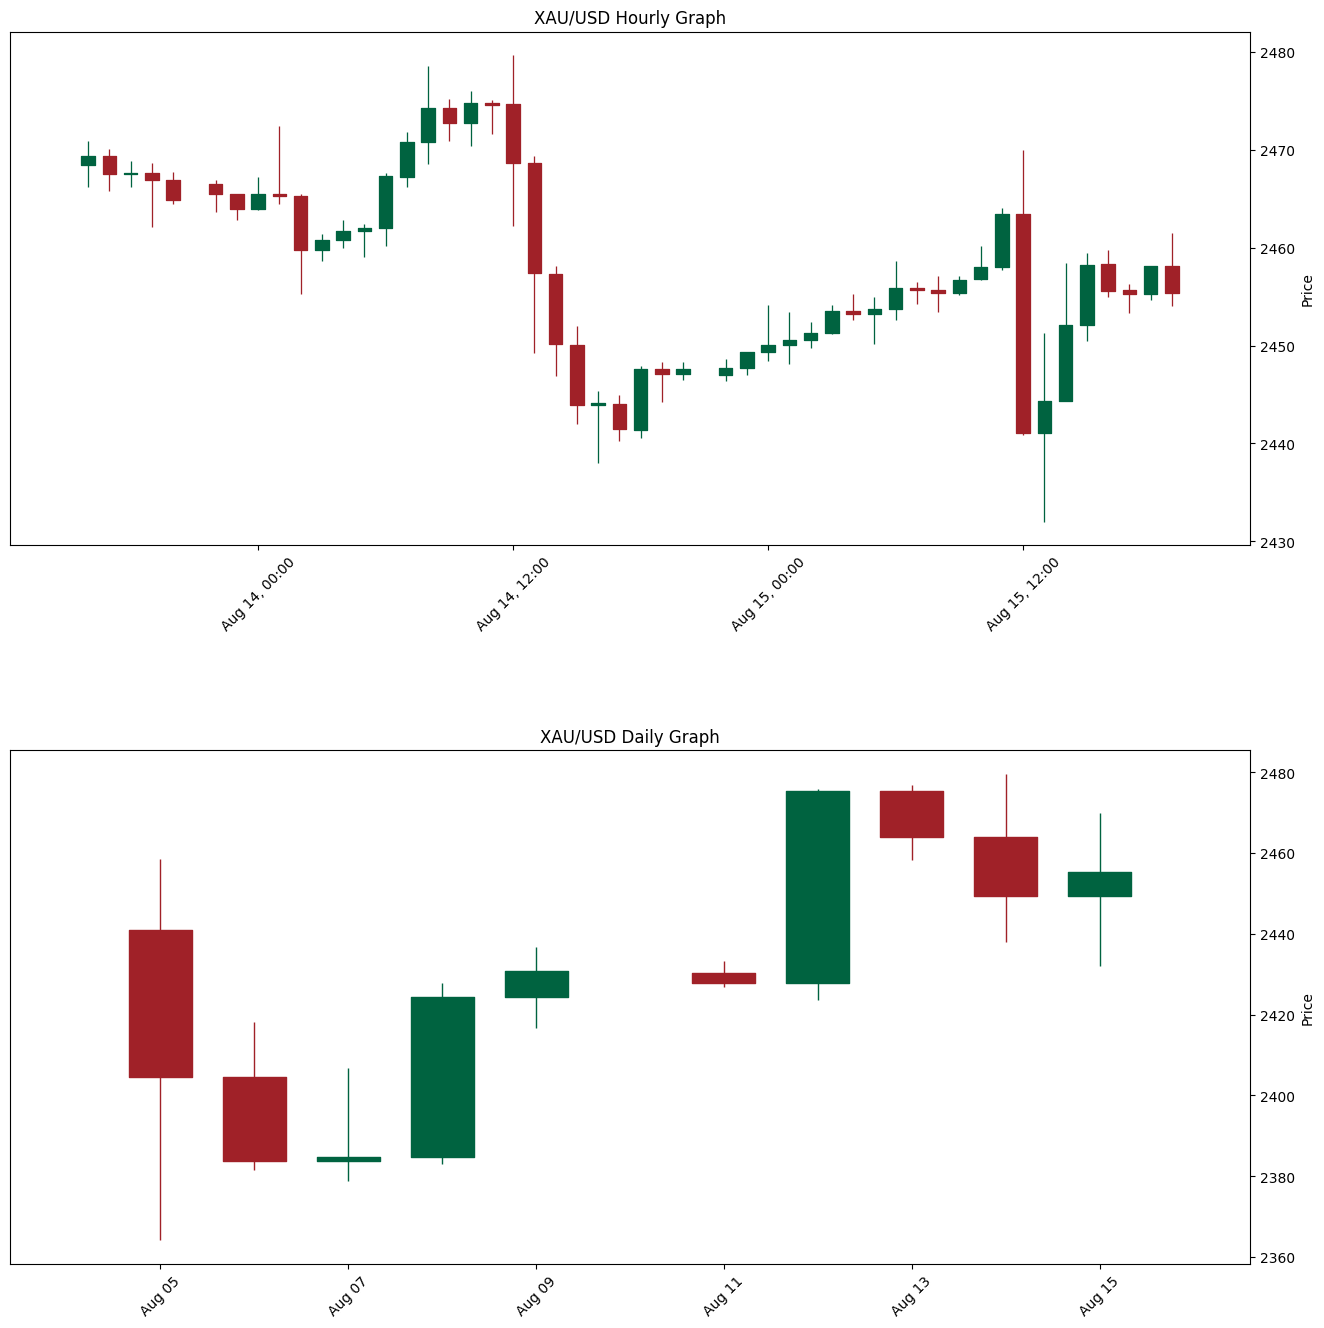

In [7]:
fig, ax = plot_two_candlestick_charts(df_h1, 50, df_d1, 10, 'XAU/USD Hourly Graph', 'XAU/USD Daily Graph')
# fig.show()


In [1]:
def save_plot_figure(fig, filename):
    # Salvar a figura no arquivo especificado
    fig.savefig(filename, bbox_inches='tight')
    
    # Fechar a figura para liberar memória
    plt.close(fig)
    
    return filename

In [2]:
# save_plot_figure(fig, 'file6.png')

In [19]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Function to combine two dataframes (1d and 1h) into one figure with SMAs
def plot_combined_candlestick_with_sma(df1d, df1h, num_candles_1d, num_candles_1h, title1, title2, short_window=10, long_window=50):
    # Filter the data for the desired number of candles
    # df1d = df1d[-num_candles_1d:]
    # df1h = df1h[-num_candles_1h:]
    df1d = df1d.loc['2024-05-01':'2024-08-12']
    df1h = df1h.loc['2024-08-05 11:00:00':'2024-08-13 10:00:00']
    
    # Calculate short and long term moving averages for both dataframes
    df1d['SMA_Short'] = df1d['Close'].rolling(window=short_window).mean()
    df1d['SMA_Long'] = df1d['Close'].rolling(window=long_window).mean()
    
    df1h['SMA_Short'] = df1h['Close'].rolling(window=short_window).mean()
    df1h['SMA_Long'] = df1h['Close'].rolling(window=long_window).mean()
    
    # Set up the chart with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Plot daily candlestick with SMAs
    apds1d = [mpf.make_addplot(df1d['SMA_Short'], ax=ax1, color='blue', label=f'SMA {short_window} periods'),
              mpf.make_addplot(df1d['SMA_Long'], ax=ax1, color='orange', label=f'SMA {long_window} periods')]
    
    mpf.plot(df1d, type='candle', style='charles', ax=ax1, axtitle=title1,
             ylabel='Price', addplot=apds1d, show_nontrading=False)
    
    # Plot hourly candlestick with SMAs
    apds1h = [mpf.make_addplot(df1h['SMA_Short'], ax=ax2, color='blue', label=f'SMA {short_window} periods'),
              mpf.make_addplot(df1h['SMA_Long'], ax=ax2, color='orange', label=f'SMA {long_window} periods')]
    
    mpf.plot(df1h, type='candle', style='charles', ax=ax2, axtitle=title2,
             ylabel='Price', addplot=apds1h, show_nontrading=False)
    
    # Add the legends
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)

    # Increase the number of ticks for the price and date labels
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=10))  # More ticks on the x-axis (dates)
    ax1.yaxis.set_major_locator(MaxNLocator(nbins=10))  # More ticks on the y-axis (prices)
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=10))  # More ticks on the x-axis (dates)
    ax2.yaxis.set_major_locator(MaxNLocator(nbins=10))  # More ticks on the y-axis (prices)
    
    # Increase axis title and label font size
    ax1.set_title(title1, fontsize=20)
    ax1.set_ylabel('Price', fontsize=16)
    ax2.set_title(title2, fontsize=20)
    ax2.set_ylabel('Price', fontsize=16)
    
    # Adjust spacing between the charts
    plt.subplots_adjust(hspace=0.4)
    
    # Return the figure (do not display yet)
    return fig, (ax1, ax2)

# Function to read the CSV and return the dataframe
def read_csv_to_dataframe(file_path):
    # Read the CSV
    df = pd.read_csv(file_path)
    
    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Ensure that the 'Open', 'High', 'Low', 'Close' columns are numeric
    df = df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)
    
    return df


/tmp/ipykernel_103246/3548054059.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1d['SMA_Short'] = df1d['Close'].rolling(window=short_window).mean()
/tmp/ipykernel_103246/3548054059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1d['SMA_Long'] = df1d['Close'].rolling(window=long_window).mean()
/tmp/ipykernel_103246/3548054059.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

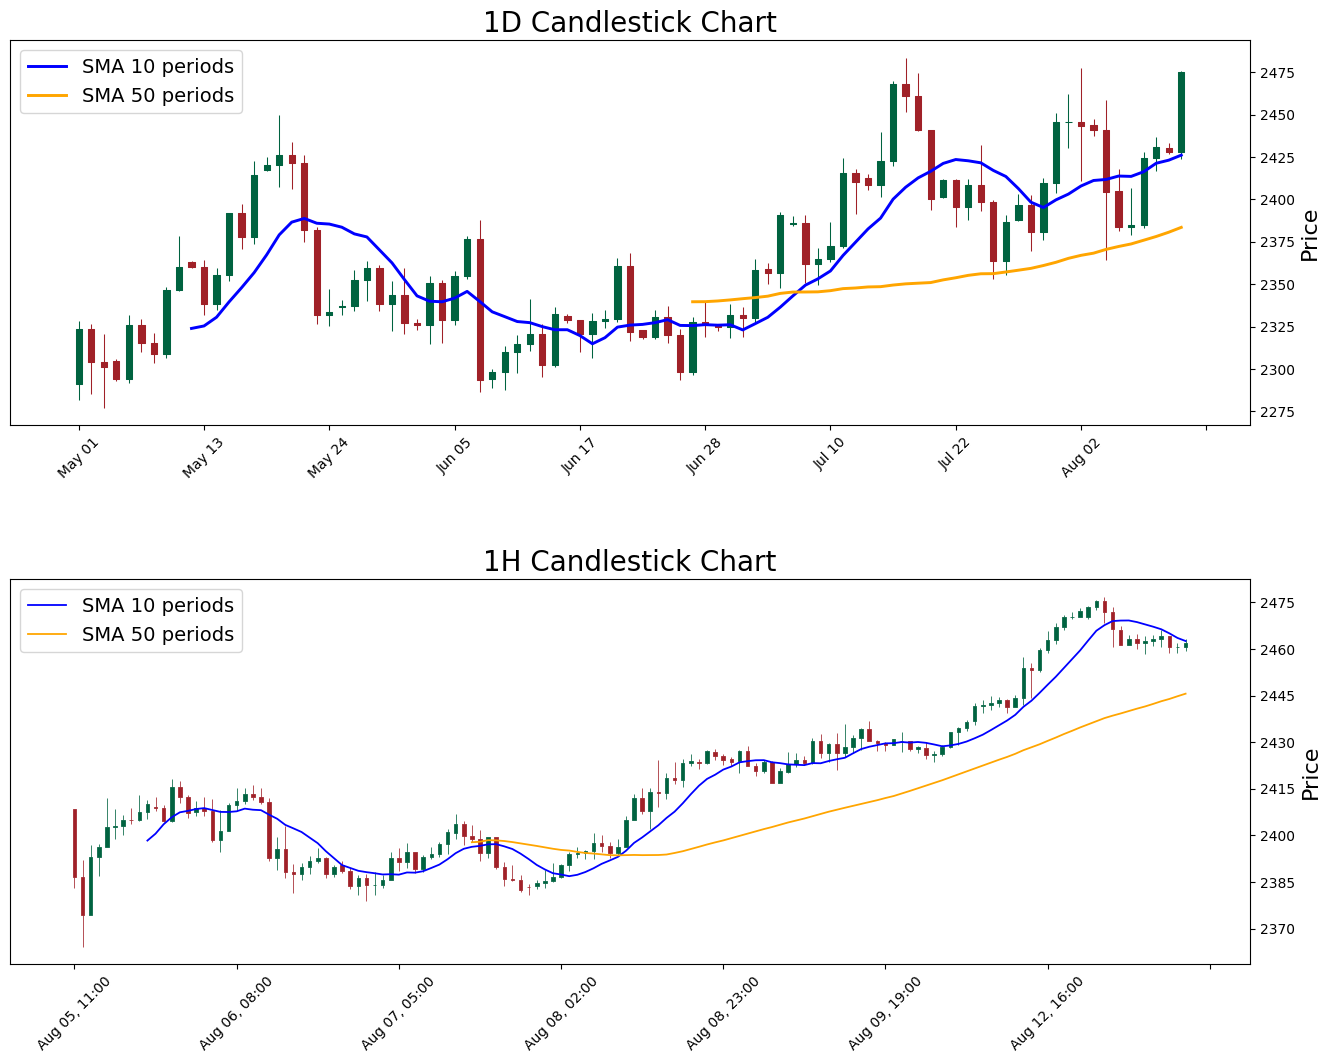

In [20]:
df1 = read_csv_to_dataframe('XAUUSD_D1.csv')
df2 = read_csv_to_dataframe('XAUUSD_H1.csv')
# Example usage
fig, (ax1, ax2) = plot_combined_candlestick_with_sma(df1, df2, 100, 100, '1D Candlestick Chart', '1H Candlestick Chart')
fig.show()  # Show the combined chart

In [12]:
save_plot_figure(fig, 'file8.jpg')

'file8.jpg'